Cars - Purchase Decision

**This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.**

Columns:

*   User ID
*   Gender
*   Age
*   Annual Salary
*   Purchase Decision (No = 0; Yes = 1)








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

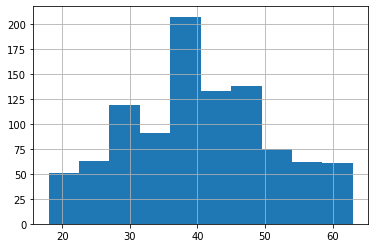

In [6]:
df.Age.hist()

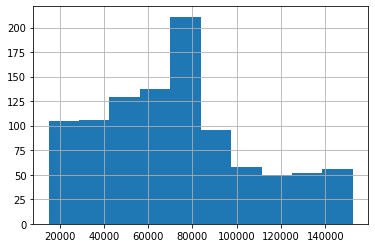

In [7]:
df.AnnualSalary.hist()

In [8]:
from sklearn import preprocessing

lableEncoder= preprocessing.LabelEncoder()
df['Gender']=lableEncoder.fit_transform(df['Gender'])

df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


In [9]:
def getAgeCategory(x):
  if int(x) in range(0,20):
    return 1
  elif int(x) in range(20,40):
    return 2
  elif int(x) in range(40,60):
    return 3
  elif int(x) in range(60,80):
    return 4

 

df['AgeCategory']=df['Age'].apply(lambda x: getAgeCategory(x))
df.head()


,User ID,Gender,Age,AnnualSalary,Purchased,AgeCategory
0,385,1,35,20000,0,2
1,681,1,40,43500,0,3
2,353,1,49,74000,0,3
3,895,1,40,107500,1,3
4,661,1,25,79000,0,2


In [10]:
df['AgeCategory'].unique()

array([2, 3, 4, 1])

In [11]:
def getAnnualSalaryCategory(x):
  if int(x) in range(0,20000):
    return 1
  elif int(x) in range(20000,40000):
    return 2
  elif int(x) in range(40000,60000):
    return 3
  elif int(x) in range(60000,80000):
    return 4
  elif int(x) in range(80000,100000):
    return 5
  elif int(x) in range(100000,120000):
    return 6
  elif int(x) in range(120000,140000):
    return 7
  elif int(x) in range(140000,160000):
    return 8

 

df['AnnualSalaryCategory']=df['AnnualSalary'].apply(lambda x: getAnnualSalaryCategory(x))
df.head()


,User ID,Gender,Age,AnnualSalary,Purchased,AgeCategory,AnnualSalaryCategory
0,385,1,35,20000,0,2,2
1,681,1,40,43500,0,3,3
2,353,1,49,74000,0,3,4
3,895,1,40,107500,1,3,6
4,661,1,25,79000,0,2,4


In [12]:
x=df.drop(['User ID','Age','AnnualSalary','Purchased'],axis=1)
y=df['Purchased']


Split arrays or matrices into random train and test subsets.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Machine Learning Model

In [15]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [16]:
def knn_model():
    knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
    knn.fit(x_train,y_train)
    return knn

def svc_model():
    svc=SVC(kernel='linear', random_state=0)
    svc.fit(x_train,y_train)
    return svc

def logsticRegresion_model():
    reg=LogisticRegression()
    reg.fit(x_train,y_train)
    return reg

def naive_model():
    naive=GaussianNB()
    naive.fit(x_train,y_train)
    return naive


def tree_model():
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0)  
    tree.fit(x_train,y_train)
    return tree

def forest_model():
    forest=RandomForestClassifier(n_estimators= 50, criterion="entropy")  
    forest.fit(x_train,y_train)
    return forest

def xgboost_model():
    xgboost=XGBClassifier()
    xgboost.fit(x_train,y_train)
    return xgboost


def gradientboost_model():
    # Setting SEED for reproducibility
    SEED = 1
    gradientboost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    gradientboost.fit(x_train,y_train)
    return gradientboost



In [26]:
data = {'algorithm': ['LogisticRegression', 'KNN', 'Naive', 'Svc','DecisionTree','RandomForest','XGBoost','GradientBoost'],
        'Train_Accuracy Score': [logsticRegresion_model().score(x_train, y_train),knn_model().score(x_train, y_train),
                        naive_model().score(x_train, y_train),svc_model().score(x_train, y_train),
                        tree_model().score(x_train, y_train),forest_model().score(x_train, y_train),
                       xgboost_model().score(x_train, y_train),gradientboost_model().score(x_train, y_train),
                       ],
        'Test_Accuracy Score': [logsticRegresion_model().score(x_test, y_test),knn_model().score(x_test, y_test),
                        naive_model().score(x_test, y_test),svc_model().score(x_test, y_test),
                        tree_model().score(x_test, y_test),forest_model().score(x_test, y_test),
                       xgboost_model().score(x_test, y_test),gradientboost_model().score(x_test, y_test),
                       ],
 

       } 
new = pd.DataFrame.from_dict(data)
  
new

,algorithm,Train_Accuracy Score,Test_Accuracy Score
0,LogisticRegression,0.726866,0.681818
1,KNN,0.862687,0.824242
2,Naive,0.805970,0.772727
3,Svc,0.711940,0.651515
4,DecisionTree,0.880597,0.866667
5,RandomForest,0.880597,0.866667
6,XGBoost,0.880597,0.866667
7,GradientBoost,0.880597,0.866667


In [18]:
xgboost_model().predict(x_test)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,

In [19]:
y_test.to_numpy()

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [23]:
df1=pd.DataFrame()
df1['y_pred']=pd.Series(forest_model().predict(x_test)).to_frame()
df1['y_test']=pd.Series(y_test.to_numpy()).to_frame()

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df1['y_test'], df1['y_pred'])

array([[174,  15],
       [ 29, 112]])